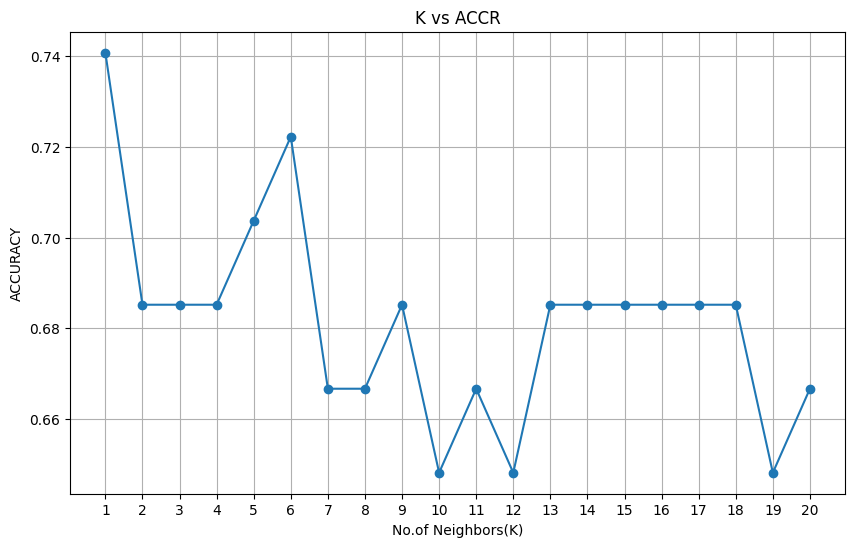

K value is 1 with accuracy of 0.74074.
Accuracy: 0.7407
Confusion Matrix is:
[[15  0  3]
 [ 1 18  5]
 [ 0  5  7]]


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine

wine = load_wine()
W = wine.data
x = wine.target


A_train,A_test,b_train,b_test= train_test_split(W,x, test_size=0.3,random_state=52)

class KNN:
    def __init__(self, k=3):
        self.k= k

    def fit(self,A,b):
        self.A_train= A
        self.b_train= b
        self.classes= np.unique(b)

    def predict(self,A):
        preds= [self._predict(x) for x in A]
        return np.array(preds)

    def _predict(self, x):
        distances= np.linalg.norm(self.A_train-x, axis=1)
        k_indices= np.argsort(distances)[:self.k]
        k_nearest_labels= [self.b_train[i] for i in k_indices]


        k_nearest_labels_indices= np.array([np.where(self.classes == label)[0][0] for label in k_nearest_labels])


        most_common_index= np.bincount(k_nearest_labels_indices).argmax()
        most_c= self.classes[most_common_index]

        return most_c

    def score(self,A_test,b_test):
        preds= self.predict(A_test)
        ACCR= np.mean(preds==b_test)


        cm = confusion_matrix(b_test,preds)

        return ACCR,cm


k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(A_train,b_train)
    accuracy, _ = knn.score(A_test,b_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs ACCR')
plt.xlabel('No.of Neighbors(K)')
plt.ylabel('ACCURACY')
plt.xticks(k_values)
plt.grid()
plt.show()

max_accuracy_index = np.argmax(accuracies)
best_k = k_values[max_accuracy_index]
best_accuracy = accuracies[max_accuracy_index]

print(f'K value is {best_k} with accuracy of {best_accuracy:.5f}.')

knn = KNN(k=best_k)
knn.fit(A_train,b_train)
accuracy,confusion_matrix =knn.score(A_test,b_test)

print(f'Accuracy: {accuracy:.3f}')
print('Confusion Matrix is:')
print(confusion_matrix)